<a href="https://colab.research.google.com/github/qudseen/cs666student/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

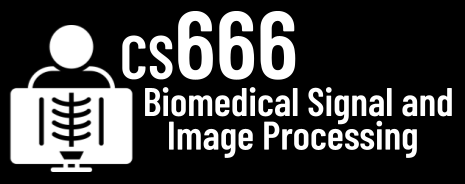
#Assignment 5

In [ ]:
# NAME:Qudseen 

In [1]:
# In this assignment, we will visualize and explore a CT scan!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.8 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: 220

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [217]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

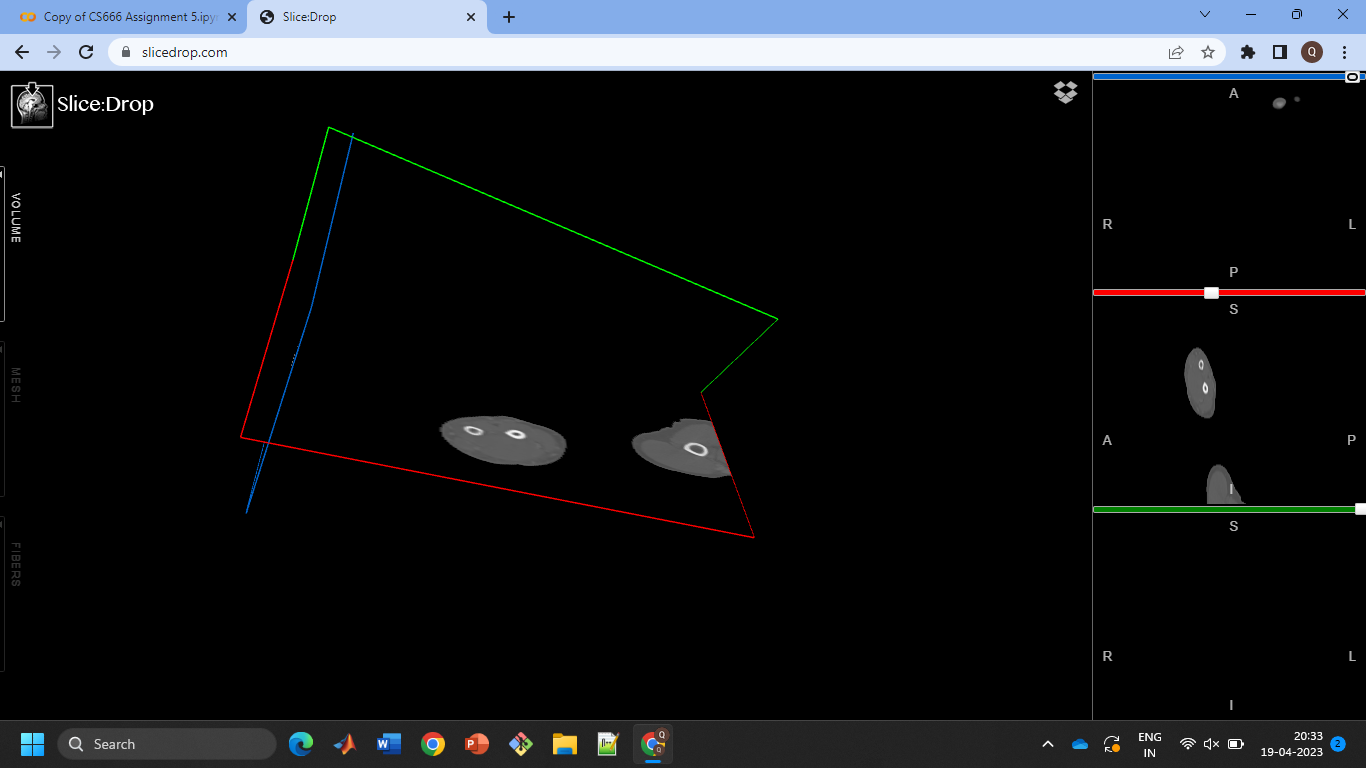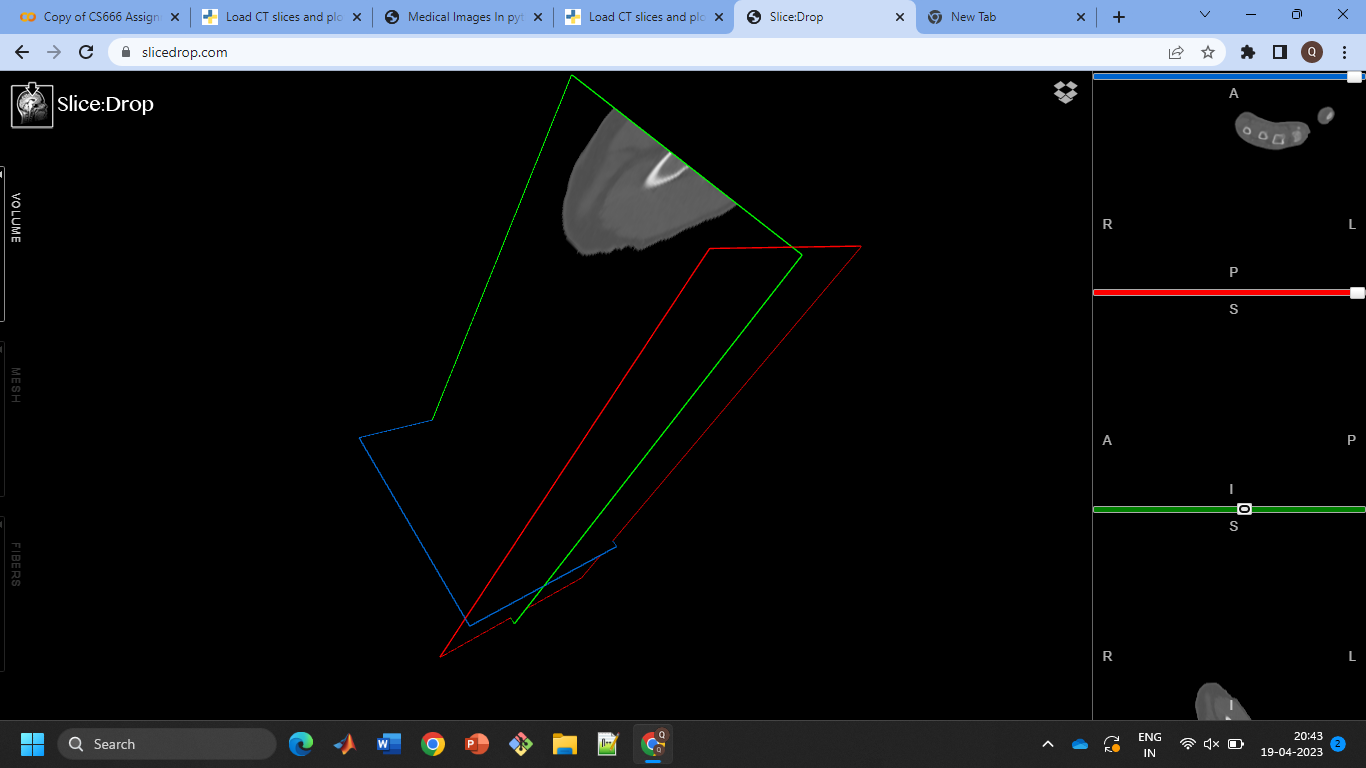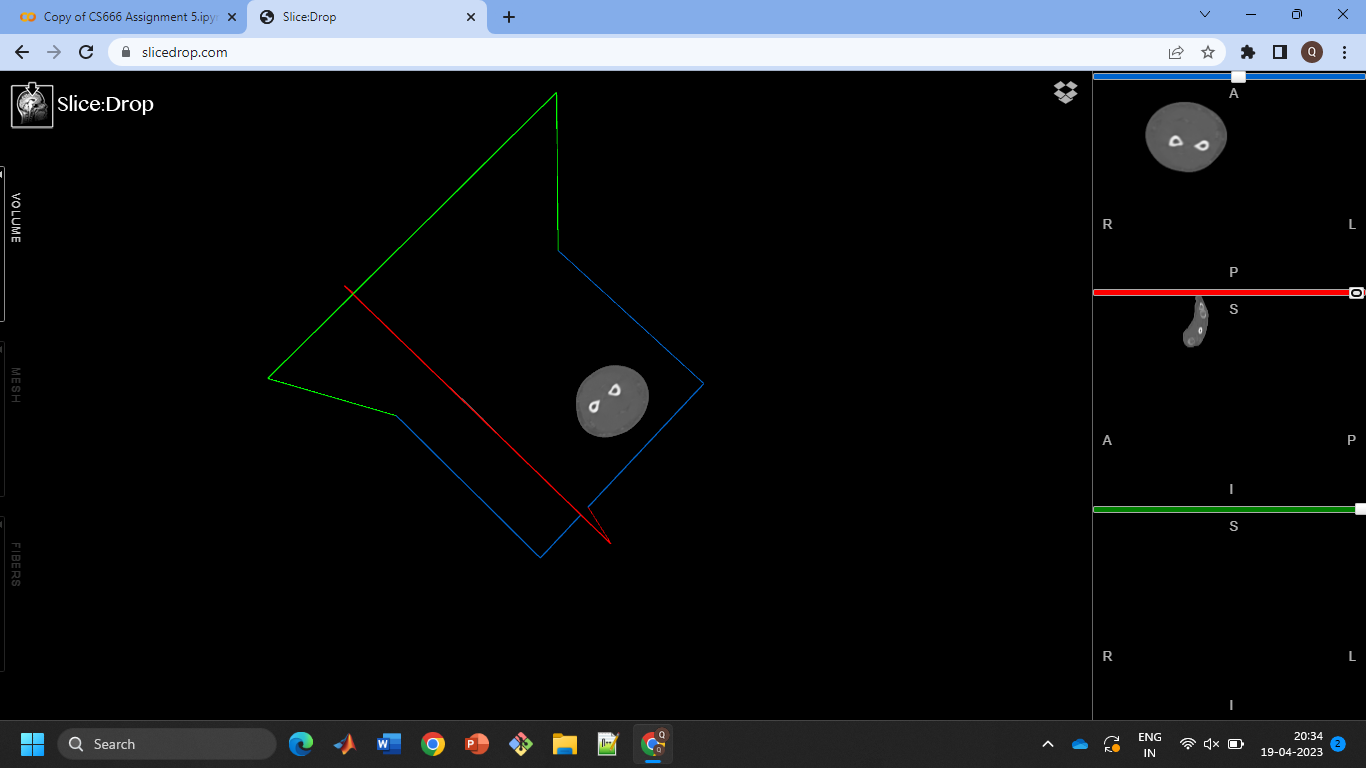

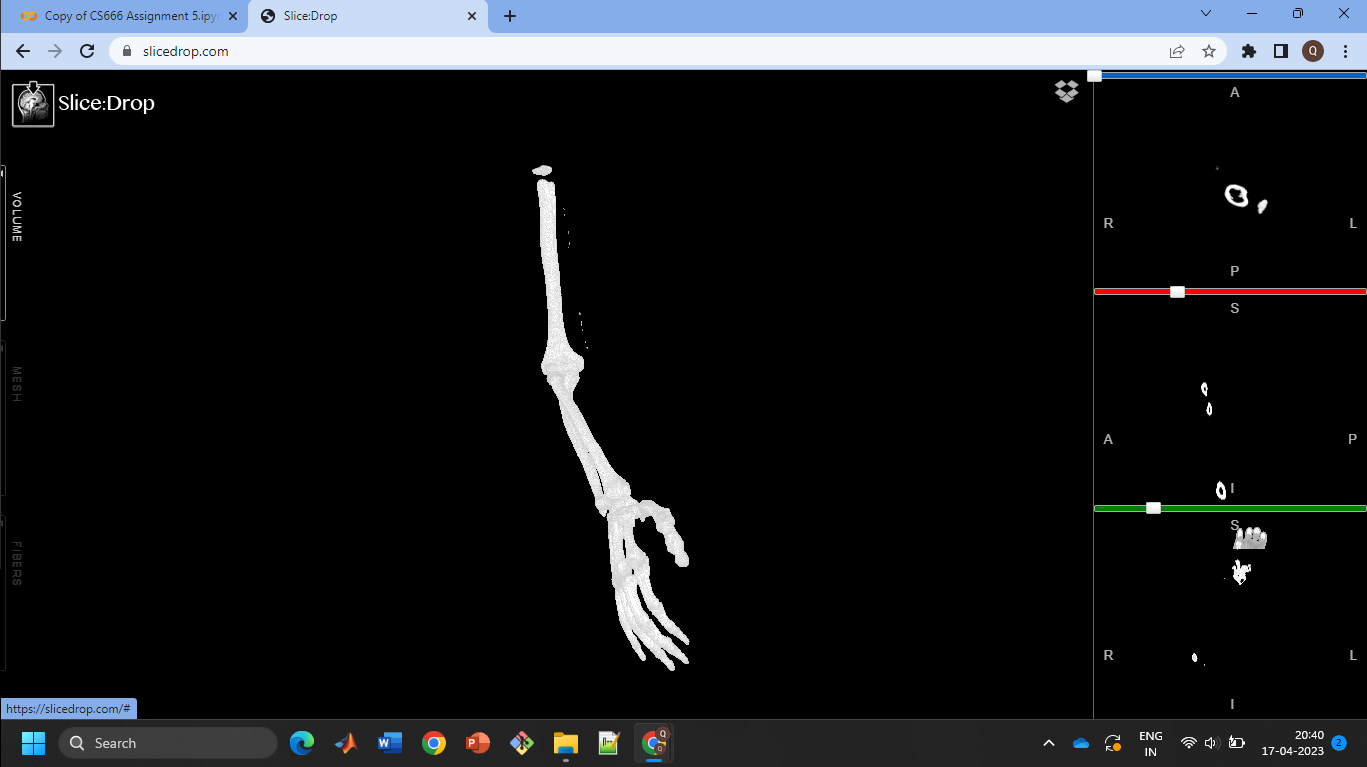

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [4]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [5]:
from pydicom import dcmread
import os

In [6]:
image1= dcmread('/content/ct/IM-0001-0001.dcm')
image1.pixel_array.shape

(454, 512)

In [8]:


all_files = sorted(os.listdir( 'ct' ))
slices = []
for file_name in all_files:
    file_path = os.path.join('ct', file_name)
    loaded_image = dcmread(file_path)
    if hasattr(loaded_image, 'SliceLocation'):
     slices.append(loaded_image)
    slices = sorted(slices, key=lambda s: s.SliceLocation)
    data = np.zeros((slices[0].Rows, slices[0].Columns, len(slices)))
    for i, s in enumerate(slices):
      data[:, :, i] = s.pixel_array

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

<function matplotlib.pyplot.show(close=None, block=None)>

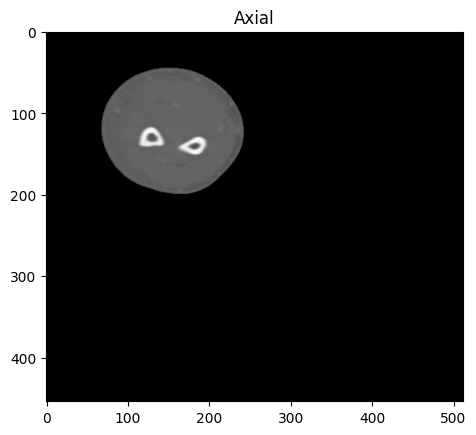

In [9]:
# TODO:
plt.title('Axial')
plt.imshow(data[:,:,data.shape[2]//2],cmap='gray')
plt.show

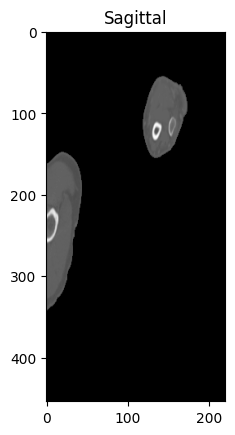

In [10]:
# TODO: 
plt.title('Sagittal')
plt.imshow(data[:,data.shape[1]//2,:],cmap='gray')
plt.show()  

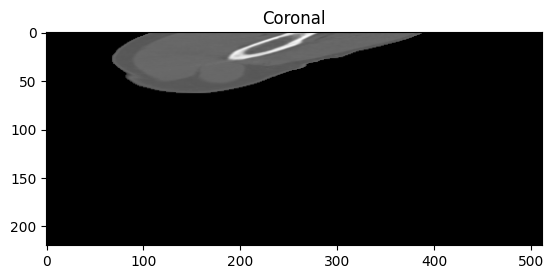

In [18]:
# TODO: YOUR CODE FOR CORONAL
plt.title('Coronal')
imshow(data[data.shape[0]//2,:,:].T,cmap='gray')
show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

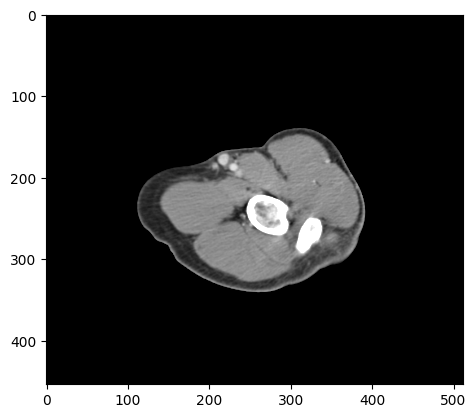

30
410


In [19]:
# TODO: 
slice = dcmread('ct/IM-0001-0220.dcm')
level = slice.WindowCenter
window =slice.WindowWidth
slice.pixel_array
intercept = slice.RescaleIntercept
slope = slice.RescaleSlope
hu_pixels = (slice.pixel_array*slope)+intercept
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
print(level)
print(window)

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

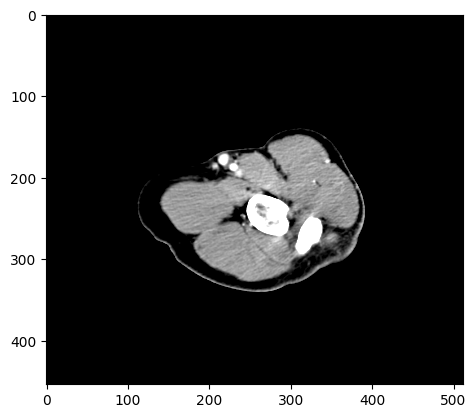

In [20]:
# TODO:
level = 30 
window = 200
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

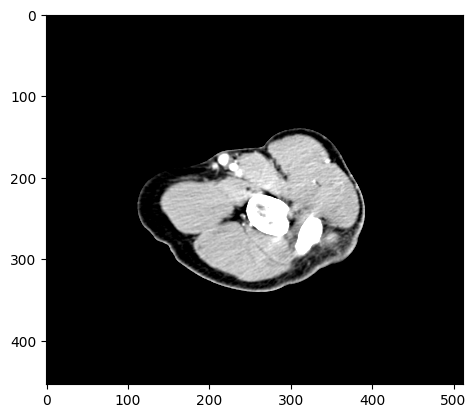

In [21]:
level = 0
window = 200
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

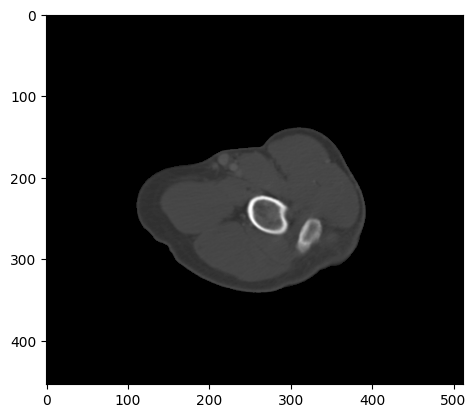

In [22]:
level = 500
window = 2000
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

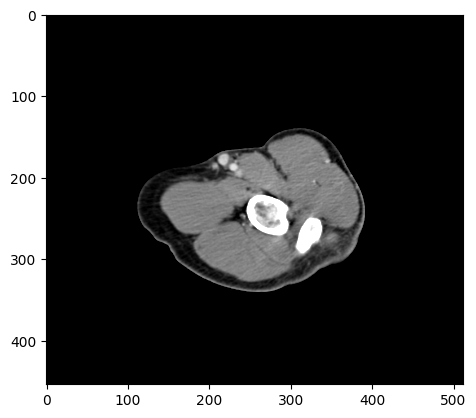

In [23]:
level = 50 
window = 350
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?
  # Increasing the window width will decrease the contrast and vice versa as the window Width (WW) as the name suggests is the measure of the range of CT numbers that a CT image contains.
  # Decreasing the window level will increase the brightness of the image and vice versa as the Window Level (WL) refers to the window centre or midpoint HU value that is represented on the window setting. 
  # For bones : A high window level near the density of bone (given its density the level is high) is used with a wide window to give a good resolution. Window settings: (W:2000, L:500)
  # For soft tissues: The window level is set at the density of soft tissues (50 HU) and a moderate-sized window is used to give a balance between contrast and resolution.Window settings: (W:350, L:50)

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

<function matplotlib.pyplot.show(close=None, block=None)>

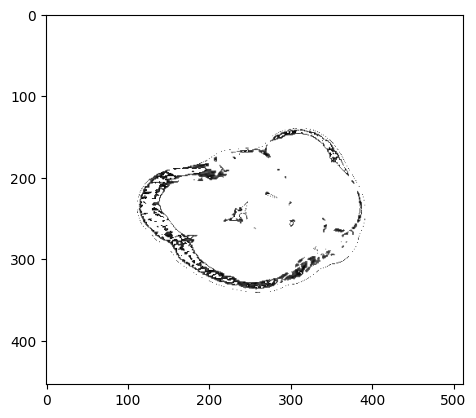

In [24]:
# TODO: YOUR CODE TO SEGMENT FAT
slice = dcmread('ct/IM-0001-0220.dcm')
intercept = slice.RescaleIntercept
slope = slice.RescaleSlope
hu_pixels = (slice.pixel_array*slope)+intercept
imagevolume=[]
imagevolume=slice.pixel_array
imagevolume = hu_pixels
new_mask = imagevolume.copy()
new_mask[(new_mask < -100) | (new_mask > -60) ] = 0
plt.imshow(new_mask, cmap="gray")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

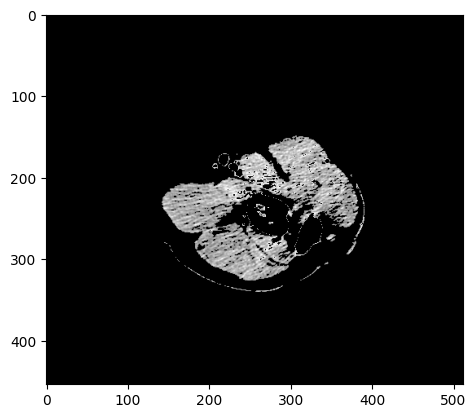

In [25]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
slice = dcmread('ct/IM-0001-0220.dcm')
intercept = slice.RescaleIntercept
slope = slice.RescaleSlope
hu_pixels = (slice.pixel_array*slope)+intercept
imagevolume=[]
imagevolume=slice.pixel_array
imagevolume = hu_pixels
new_mask = imagevolume.copy()
new_mask[(new_mask < 40) | (new_mask > 80) ] = 0
plt.imshow(new_mask, cmap="gray")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

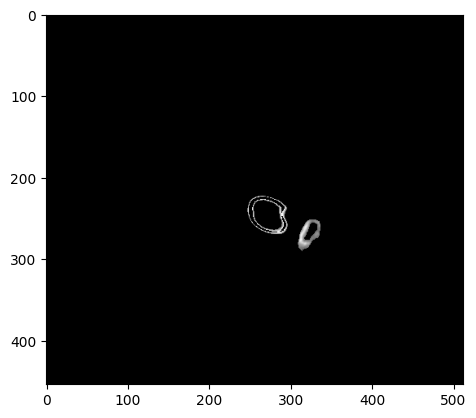

In [26]:
# TODO: YOUR CODE TO SEGMENT BONES
slice = dcmread('ct/IM-0001-0220.dcm')
intercept = slice.RescaleIntercept
slope = slice.RescaleSlope
hu_pixels = (slice.pixel_array*slope)+intercept
imagevolume=[]
imagevolume=slice.pixel_array
imagevolume = hu_pixels
new_mask = imagevolume.copy()
new_mask[(new_mask < 400) | (new_mask > 1000) ] = 0
plt.imshow(new_mask, cmap="gray")
plt.show

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: yes 

In [ ]:
# references :  
              # https://pydicom.github.io/pydicom/dev/auto_examples/image_processing/reslice.html
              #https://www.geeksforgeeks.org/os-module-python-examples/?ref=lbp
              #https://stackoverflow.com/questions/58791377/medical-image-quality-problem-with-dicom-files
              #https://vincentblog.xyz/posts/medical-images-in-python-computed-tomography
              #https://kevalnagda.github.io/ct-windowing

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""